In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

In [ ]:
time_df = pd.read_csv("../Output/computational_time.csv")

In [ ]:
time_df.head(3)

In [2]:
print("{:.4f} ± {:.4f} (diff_time)".format(time_df["diff_time"].mean(), time_df["diff_time"].std()))
print("{:.4f} ± {:.4f} (subgraphX_time)".format(time_df["subgraphX_time"].mean(), time_df["subgraphX_time"].std()))
print("{:.4f} ± {:.4f} (molgraph_time)".format(time_df["molgraph_time"].mean(), time_df["molgraph_time"].std()))

0.7909 ± 0.1027 (diff_time)
14.9253 ± 7.7814 (subgraphX_time)
54.7044 ± 34.6771 (molgraph_time)


In [3]:
def get_molecular_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    weight = Descriptors.MolWt(mol)
    return weight

time_df["weight"] = time_df["smiles"].apply(get_molecular_weight)
time_df["rounded_weight"] = time_df["weight"].apply(lambda mass: round(mass, -1))

In [4]:
time_df.head(3)

,smiles,diff_time,subgraphX_time,molgraph_time,weight
0,CCC1(C)OCOC1=N,1.603419,9.283341,86.006832,129.159
1,Cc1ccc(=N)oc1F,0.795363,22.453839,68.853090,127.118
2,CC1C2CC3CC3C12,0.559640,5.640463,48.610227,108.184
3,Cc1ccncn1,0.601495,8.937021,21.520368,94.117
4,C#CC1(CCC)CC1C,0.812488,7.486056,53.940720,122.211
...,...,...,...,...,...
96,CC1CN2C(=O)NCC12,0.817645,27.437932,89.026837,126.159
97,C#Cc1c(C)noc1N,0.797627,22.204591,73.936715,122.127
98,OCC1NC12COC2,0.757053,7.080355,15.435908,115.132
99,O=C1C2COC13CCC23,0.843380,35.287477,132.896077,124.139


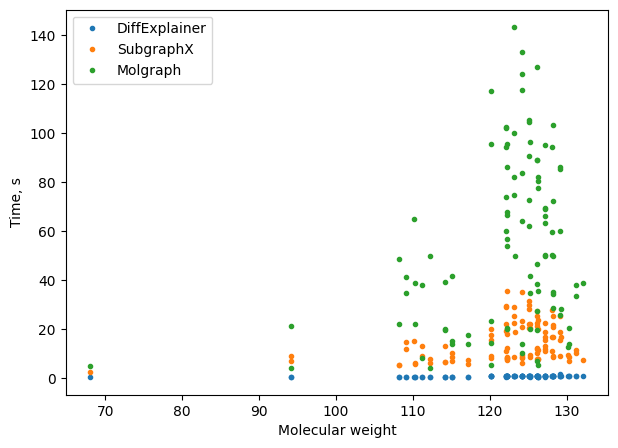

In [6]:
weights = list(sorted(time_df["rounded_weight"].unique().tolist()))
methods = ["subgraphX", "submoleculeX", "molgraph", "molgraphX"]

for method in methods:
    time_mean = []; time_std = []
    for weight in weights:
        time = time_df[time_df["rounded_weight"] == weight][method].to_numpy()
        time_mean += [time.mean()]
        time_std += [time.std()]
    plt.errorbar(weights, time_mean, yerr=time_std, label=method)
plt.xlabel("Rounded molar mass (g/mol)")
plt.ylabel("Computational time (s)")
plt.legend()